<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

# Functions

In [2]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")
source("~/OneDrive - UHN/R_src/plotting_functions.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [4]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [5]:
table(metadata_IC$immune_cluster)


 C1  C2  C3  C4 
 90 279 393 163 

In [6]:
icgc <- metadata_IC[ metadata_IC$group == "ICGC",]

In [7]:
dim(icgc)

[1] 195  24

In [8]:
aceseq <- read.table(file = paste0(datapath, "ACEseq/ACEseqPurityScore_ImmuneScore_ICGC_pedbrain.txt"), sep = "\t",
                    header = T, stringsAsFactors = F)

In [9]:
dim(aceseq)

[1] 197  10

In [10]:
colnames(aceseq)[ colnames(aceseq) == "SampleID"] <- "sample_id"

In [11]:
icgc_aceseq <- merge(icgc, aceseq[, c("sample_id", "ACEseqTumorPurityScore")], by = "sample_id")

In [12]:
dim(icgc_aceseq)

[1] 156  25

In [13]:
write.csv(icgc_aceseq, file = "~/Downloads/icgc_aceseq.csv")

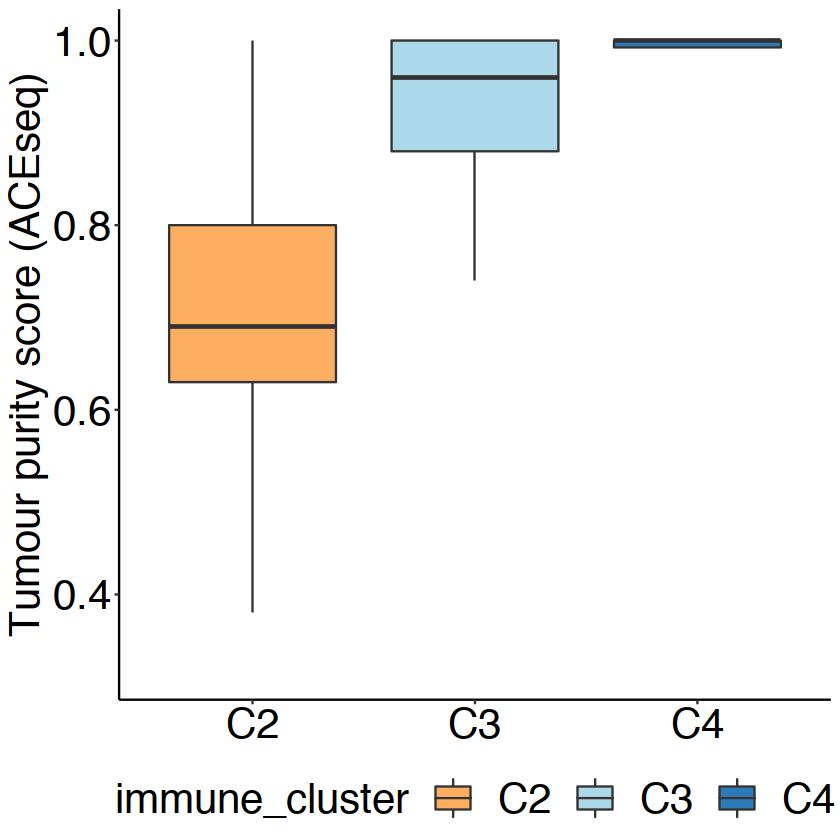

In [38]:
aceseqplot <- ggplot(data = icgc_aceseq, 
                     aes(x = immune_cluster, y = ACEseqTumorPurityScore, fill = immune_cluster)) + 
geom_boxplot(outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) +
theme(legend.position = "bottom", 
      axis.text.x = element_text(angle = 0, hjust = 0.5),
     axis.title.x = element_blank()) + labs(y = "Tumour purity score (ACEseq)") 

aceseqplot

In [39]:
tapply(icgc_aceseq$ACEseqTumorPurityScore, icgc_aceseq$immune_cluster, summary)

$C2
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3300  0.6300  0.6900  0.6989  0.8000  1.0000 

$C3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3200  0.8800  0.9600  0.9077  1.0000  1.0000 

$C4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8800  0.9925  1.0000  0.9812  1.0000  1.0000 


In [40]:
pairwise.t.test(icgc_aceseq$ACEseqTumorPurityScore, icgc_aceseq$immune_cluster, 
                p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  icgc_aceseq$ACEseqTumorPurityScore and icgc_aceseq$immune_cluster 

   C2               C3  
C3 0.00000000000055 -   
C4 0.00000218215334 0.18

P value adjustment method: none 

In [42]:
pdf(paste0(plotpath, "ICGC_IC_ACEseq.pdf"),
   width = 8, height = 8,useDingbats = FALSE)

aceseqplot

dev.off()

pdf 
  2